In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
# PLOT.

def plot_classification(classifier, X,Y):
    # definisco i set che mi servono.
    X_set, y_set = sc.inverse_transform(X), Y
    
    # creo una griglia di punti per creare la linea di confine.
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
    
    # partiziono lo spazio sulla base della griglie e delle predizioni fatte su di essa. 
    plt.contourf(X1, 
                 X2, 
                 classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, 
                 cmap = ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # inserisco i punti del dataset scelto e li coloro in base alla classe.
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], # seleziono i punti della var. dipendente associati ad una certa categoria,
                    X_set[y_set == j, 1], # ne prendo i due valori che mi servono e li plotto.
                    c = ListedColormap(('red', 'green'))(i), 
                    label = j # legenda.
                   )
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

    
def after_class(classifier, X_test, Y_test):
    # CONFUSION MATRIX: C00 is the true negative. 
    # Column is the result of the predictor.
    CM = confusion_matrix(Y_test, classifier.predict(X_test))
    ACC = accuracy_score(Y_test, classifier.predict(X_test))
    print('\n Accuracy: ', ACC, '\n', 'Confusion matrix: \n', CM)

<h1><center> CLASSIFICATION TECHNIQUES </h1></center>

These algorithms aim to predict a category unlike the regresion models which predict continuous values. 

In [32]:
# INITIAL SETUP.
data = pd.read_csv('Dataset/Social_Network_Ads.csv')
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

# NO ENCODING AND NO MISSING VALUES.

# SPLIT DATASET.

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

# FEATURE SCALING: it's necessary but it improves the result.
# In some technique, such as SVR, it's mandatory/compulsory while fot other ones
# can increase the accuracy of the result.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3><center> LOGISTIC REGRESSION </h1></center>

Regression with categorical data doesn't perform very well. However, we don't seaRch the best straight line but the function how model th probability of values. So, starting from the simple regression line:
$y = \beta_0 + \beta_1 x$, build the sigmoid function: $p(X=1) = \frac{1}{1+e^{-y}}$ which represents that probability. It's important to note that given a straight line for a 3D problem, each point $(x,y)$ that layies on that line has the same probability $p(X=1)$, in other word, the same value of Z. So, there is a straight lane (or an hyperplane) that has the role of border line for which the probability is exactlt the threshold. Logisitc regression is a _linear_ model. The aim of the logistic regression is to find the best function: $ln(\frac{p}{1-p}) = \beta_0 + \beta_1 x$. In the training set, the aim is to find the best probability function with the computation of the logisitc regression function. So, given new data and after fix a threshold, the classification can occur. 

In [33]:
# LOGISTIC REGRESSION.
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train,Y_train) # C parameter takes into account the regularization. 

# PREDICT NEW VALUE: there is the predict of the classification value,
# predict log and theprediction of the probability. 
LR.predict(sc.transform([[3, 87000]]))

# measure the performance.
after_class(LR, X_test, Y_test)


 Accuracy:  0.925 
 Confusion matrix: 
 [[57  1]
 [ 5 17]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


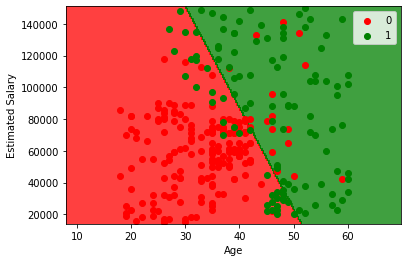

In [11]:
plot_classification(LR, X_train,Y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


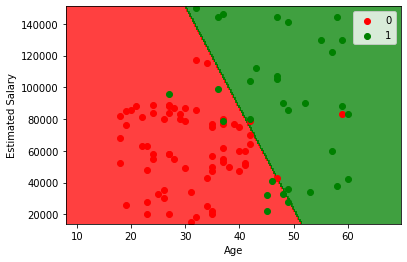

In [12]:
plot_classification(LR, X_test, Y_test)

<h3><center> K-NN </h3></center>

Suppose to have two distict categories. Given a new data point, which is his category? 
Step:
- Choose the number $K$ of neighbour
- Take the $K$ nearest neughbours of the new data point, according to the Euclidean distance
- Among these $K$ neighbours, count the number of data points in each category
- Assign the category of the new data to the category most common in the neighbour

It only make a classification on the new point with the euclidean instance, i.e. lazy algorithm. Especially, the separation line isn't linear. 

In [34]:
# k-nn.
from sklearn.neighbors import KNeighborsClassifier
NN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
NN.fit(X_train,Y_train) # C parameter takes into account the regularization. 


# PREDICT NEW VALUE: there is the predict of the classification value,
NN.predict(sc.transform([[3, 87000]]))

# measure the performance.

after_class(NN, X_test, Y_test)


 Accuracy:  0.95 
 Confusion matrix: 
 [[55  3]
 [ 1 21]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


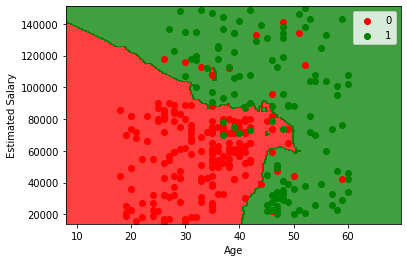

In [5]:
plot_classification(NN, X_train, Y_train)

In [ ]:
plot_classification(NN, X_test, Y_test)

<h3><center> SUPPORT VECTOR MACHINES </h3></center>

They are different to other ML algorithm. It finds the best boundary between the sets. It's a linear model. In the training phase, if the set are separable, there are many hyperplane which divide the set. However, the choice is important when a new point'll classified. So, the **margin** is defined on the basis of the **support vector**, which are the only that determines the shape of the hyperplane, namely the distance between them and the hyperplane.  Why they are so popular? The support vector are the ones which are the anomalouos points, the one in which tha class is not well defined. 

In [35]:
# k-nn.
from sklearn.svm import SVC
Supp = SVC(kernel = 'linear', random_state = 0) # linear kernel.
Supp.fit(X_train,Y_train) # C parameter takes into account the regularization. 

# PREDICT NEW VALUE: there is the predict of the classification value,
Supp.predict(sc.transform([[3, 87000]]))

# measure the performance.
after_class(Supp, X_test, Y_test)


 Accuracy:  0.9125 
 Confusion matrix: 
 [[57  1]
 [ 6 16]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


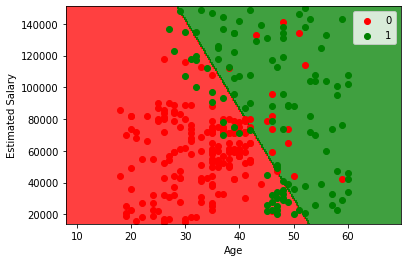

In [15]:
plot_classification(Supp, X_train, Y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


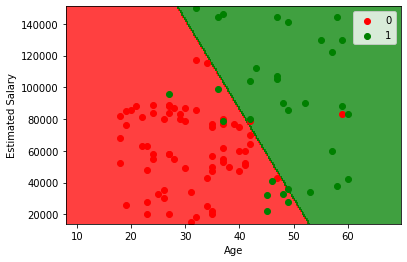

In [16]:
plot_classification(Supp, X_test, Y_test)

<h3><center> NO KERNEL SVM </h3></center>


There are some situations in which the sets aren't **linearly separable** with a straight line. In this situation, we add another dimension in which data are linearly separable. 

We start with a one-dimensional problem. With a function, it's possible to increase a dimension on the basis of it. As a consequence, if the right tranformation is choosen, the set'll become separable:

$$
\phi(x_1, x_2) = (x_1, x_2, z)
$$
So, in the new space, we define the hyperplane that separe the sets. However, there is an important problem: mapping can be compute-intensive.

There are different kernle function: 
- The **gaussian or radial kernel** is defined as follows:

$$K(\vec{x}, \vec{l}^i)=e^{\frac{-||\vec{x} - \vec{l}^i||^2}{2\sigma^2}}$$

where $\vec{l}$ are the landmark. The function is a gaussian built on the basis of the points of the dataset. Closer points to the mean are the kernel value higher than the ones which are far away. The result depends on the value of $\sigma$. It's possible also to compose different kernel functions, e.g. the sum of two gaussian kernel with different landmark. 

- Sigmoid function

$$ K(X,Y) = tanh(\gamma X^T Y +r)$$

- Polynomial kernel:

$$ K(X,Y) = (\gamma X^T Y +r)^d, \gamma >0$$

Let's talk about the **non-linear SVR**. Suppose to have a set in which the stright line doesn't fit well. This algorithm applies a kernel function and before the SVR linear in a $K+1$ dimension is performed. So, the tube in that dimension is found.

In [36]:
# k-nn.
from sklearn.svm import SVC
RBF = SVC(kernel = 'rbf', random_state = 0) # linear kernel.
RBF.fit(X_train,Y_train) # C parameter takes into account the regularization. 

# PREDICT NEW VALUE: there is the predict of the classification value,
RBF.predict(sc.transform([[3, 87000]]))

# measure the performance.
after_class(RBF, X_test, Y_test)


 Accuracy:  0.95 
 Confusion matrix: 
 [[55  3]
 [ 1 21]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


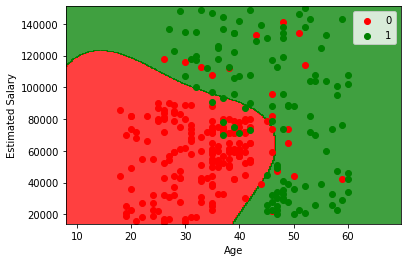

In [6]:
plot_classification(RBF, X_train, Y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


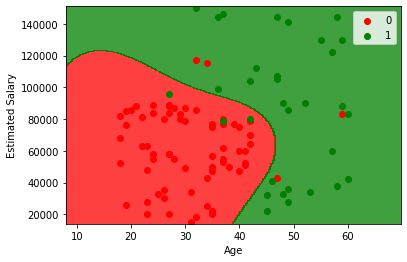

In [7]:
plot_classification(RBF, X_test, Y_test)

<h3><center> NAIVE BAYES </h3></center>

It relies on the Bayes theorem:
$$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)},
$$
where $Y \in \{0,1\}$ is the category of the binary dependent variable, while $X$ represent the set of other variables. In the training phase, we compute the $P(Y)$ on the basis of the number of record with that cateogory, $P(X)$ is the ratio between the number of similar observation and the total observation, namely the probability that one new point fell into the circle which we define, and finally,  $P(X|Y) = \frac{\# of X in the circle with that Y}{\# of X with that Y}$. So, we compute the value of $P(Y|X)$ for the two categories and finally, given a threshold, we decide how to classify the record. 

This algorithm relies on the _independence assumption_.  

Questions:

- Why Naive? For the independence assumption between dependent fields which sometimes isn't correct, indeed it can be akind of correlation. However, the result can be good anyway.
-$P(X)$? We draw a circle with the input parameters. P(X) is the probability of finding a point which have almost the same characteristics of the provided point. When it's necessary to compare the proability of the different categories given $X$, it's possible to avoid the computation of $P(X)$, indeed:
$$ \frac{P(X|Y=0)P(Y)}{P(X)} >  \frac{P(X|Y=1)P(Y)}{P(X)} ?$$
since the denominator can be dropped. However, in general we compute only one of them and chack out if it overcome the threshold.
- What if there are more classes? If there only two classes, we compare the probability as above. In other cases, there are only much probability to compare.

In [37]:
from sklearn.naive_bayes import GaussianNB
# the function for the probability is a normal distribution. 
NB = GaussianNB()
NB.fit(X_train, Y_train)

y_pred = NB.predict(X_test)

after_class(NB, X_test, Y_test)


 Accuracy:  0.9125 
 Confusion matrix: 
 [[55  3]
 [ 4 18]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


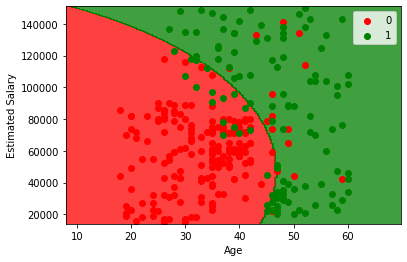

In [9]:
plot_classification(NB, X_train, Y_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


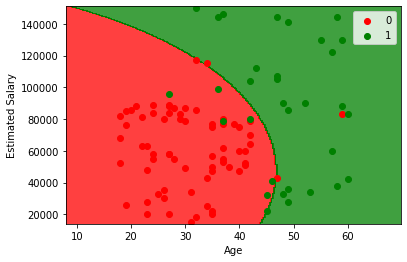

In [12]:
plot_classification(NB, X_test, Y_test)

<h3><center> DECISION TREE CLASSIFICATION </h3></center>

CART: classification and regression trees. The latter has described in the previous section. We ocus our attention on the classification. The idea is similar, indeed in the classification we cut and split the space into leaves in the training phase. The aim is to maximise the number of points with the same classification category. Then, in the testing phase, we define the leaf within the point fall and finally, we classify it with the the _major voting rule_. They are used to befamous but nowdays they aren't so popoular anymore. However, some upgrates, such as gradient boosting or random forest, have made a reborn of those techinques. 

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=1, criterion = 'entropy')
DTC.fit(X_train, Y_train)

y_pred = DTC.predict(X_test); y_pred

after_class(DTC, X_test, Y_test)


 Accuracy:  0.9 
 Confusion matrix: 
 [[53  5]
 [ 3 19]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


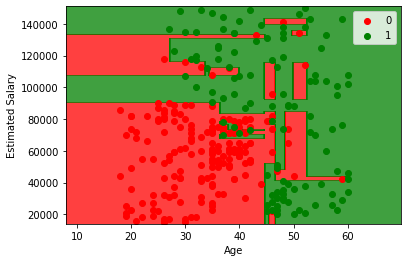

In [16]:
plot_classification(DTC, X_train, Y_train)

# it's able to catch some points which are difficult to classify with a smooth curve.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


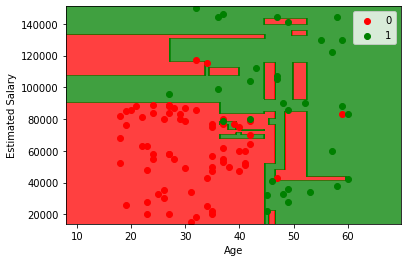

In [17]:
plot_classification(DTC, X_test, Y_test)

<h3><center> RANDOM FOREST </h3></center>
 
It relies on the concept of _ensemble learning_, namely the usage of different types of algorithms in order to reach the best result. New points are classified on the basis of the major rule voting.

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, # increase them, the result'll be more accurate.
                            criterion = 'entropy', random_state = 0)
RF.fit(X_train, Y_train)

after_class(RF, X_test, Y_test)


 Accuracy:  0.9375 
 Confusion matrix: 
 [[55  3]
 [ 2 20]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


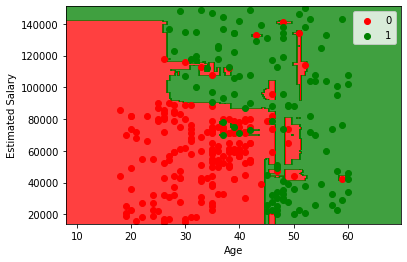

In [29]:
# there is a bit of overfitting.
plot_classification(RF, X_train, Y_train)

In [ ]:
plot_classification(RF, X_test, Y_test)

<h3><center> EVALUATING CLASSIFICATION TECHNIQUES </h3></center>

Topics:
- _False positive_ (Type I error) vs. _False negative_ (Type II error). 
- _Confusion matrix_ with accuracy and error.
- _The paradox of accuracy_: the accuracy can be associated to different confusion matrix. So, it's noteworthy to check out the confusion matrix in order to understand if the algorithm, for example, assign all classification to only one category.
- _CAP curve (Cumulative Gains Curve)_. It's useful in order to understand how much the classifier is accurate when it gives likelihood to new data points. The principle is the following: classify the test set, give the correspondence likelihood, sort the points in the order given by the probability, change the dimension of selected points from the top and compute the number of the points within it which present the category of the classification. On the X-axis there is the dimension of the sample, while in the Y-axis there is the percentage of the points in the sample of a specific category on the total of that category. So, the best curve is the one which show the trend in which, after sorting the points on the basis of likelihood, there is a percentage of the sample which contain all of the points with that category. This means that the classifier is able to recognize with high accuracy the categories. 
